In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving football_CLEAN.csv to football_CLEAN.csv


In [4]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "football_CLEAN.csv" with length 34648 bytes


In [5]:
uploaded

{'football_CLEAN.csv': b"name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing\r\nAlexis Sanchez,Arsenal,28,LW,1,65,4329,12,17.10%,264,3,Chile,0,4,1,1,0\r\nMesut Ozil,Arsenal,28,AM,1,50,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0\r\nPetr Cech,Arsenal,35,GK,4,7,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0\r\nTheo Walcott,Arsenal,28,RW,1,20,2393,7.5,1.50%,122,1,England,0,4,1,1,0\r\nLaurent Koscielny,Arsenal,31,CB,3,22,912,6,0.70%,121,2,France,0,4,1,1,0\r\nHector Bellerin,Arsenal,22,RB,3,30,1675,6,13.70%,119,2,Spain,0,2,1,1,0\r\nOlivier Giroud,Arsenal,30,CF,1,22,2230,8.5,2.50%,116,2,France,0,4,1,1,0\r\nNacho Monreal,Arsenal,31,LB,3,13,555,5.5,4.70%,115,2,Spain,0,4,1,1,0\r\nShkodran Mustafi,Arsenal,25,CB,3,30,1877,5.5,4.00%,90,2,Germany,0,3,1,1,1\r\nAlex Iwobi,Arsenal,21,LW,1,10,1812,5.5,1.00%,89,4,Nigeria,0,1,1,1,0\r\nGranit Xhaka,Arsenal,24,DM,2,35,1815,5.5,2.00%,85,2,Switzerland,0,2,1,1,0\

In [6]:
import io

In [7]:
train= pd.read_csv(io.StringIO(uploaded['football_CLEAN.csv'].decode('utf-8')))
train.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0


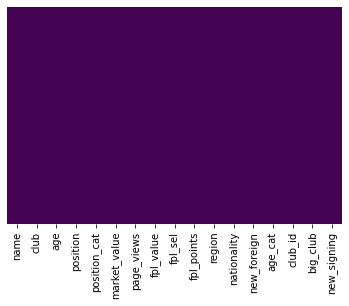

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
train.drop(['name'],axis=1,inplace=True)

In [10]:
train.head()

,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0
1,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0
2,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0
3,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1,England,0,4,1,1,0
4,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0


In [11]:
train.drop(['club'],axis=1,inplace=True)

In [12]:
train.head()

,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,28,LW,1,65.0,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0
1,28,AM,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0
2,35,GK,4,7.0,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0
3,28,RW,1,20.0,2393,7.5,1.50%,122,1,England,0,4,1,1,0
4,31,CB,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0


In [13]:
train.drop(['position'],axis=1,inplace=True)
train.head()

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,28,1,65.0,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0
1,28,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0
2,35,4,7.0,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0
3,28,1,20.0,2393,7.5,1.50%,122,1,England,0,4,1,1,0
4,31,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0


In [14]:
train.drop(['nationality'],axis=1,inplace=True)
train.head()

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
0,28,1,65.0,4329,12.0,17.10%,264,3,0,4,1,1,0
1,28,1,50.0,4395,9.5,5.60%,167,2,0,4,1,1,0
2,35,4,7.0,1529,5.5,5.90%,134,2,0,6,1,1,0
3,28,1,20.0,2393,7.5,1.50%,122,1,0,4,1,1,0
4,31,3,22.0,912,6.0,0.70%,121,2,0,4,1,1,0


In [15]:
train['FPL_SEL'] = pd.to_numeric(train['fpl_sel'].str[:-1])
train.head()

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing,FPL_SEL
0,28,1,65.0,4329,12.0,17.10%,264,3,0,4,1,1,0,17.1
1,28,1,50.0,4395,9.5,5.60%,167,2,0,4,1,1,0,5.6
2,35,4,7.0,1529,5.5,5.90%,134,2,0,6,1,1,0,5.9
3,28,1,20.0,2393,7.5,1.50%,122,1,0,4,1,1,0,1.5
4,31,3,22.0,912,6.0,0.70%,121,2,0,4,1,1,0,0.7


In [16]:
train.drop(['fpl_sel'],axis=1,inplace=True)
train.head()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing,FPL_SEL
0,28,1,65.0,4329,12.0,264,3,0,4,1,1,0,17.1
1,28,1,50.0,4395,9.5,167,2,0,4,1,1,0,5.6
2,35,4,7.0,1529,5.5,134,2,0,6,1,1,0,5.9
3,28,1,20.0,2393,7.5,122,1,0,4,1,1,0,1.5
4,31,3,22.0,912,6.0,121,2,0,4,1,1,0,0.7


In [17]:
X= train.drop('market_value',axis=1)
Y= train['market_value']

In [18]:
from sklearn.model_selection  import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(345, 12)
(116, 12)
(345,)
(116,)


LINEAR REGRESSION

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
from sklearn import metrics

In [22]:
pred = regressor.predict(X_test)

In [55]:
print(pred)

[ 1.78500698 18.72348397 11.14783687  9.30928964 13.18242016  1.85004844
  3.13320882  1.5478006   3.64631318  6.49640386 -1.88708842  9.59915868
 17.3594591   3.22442863  0.79212363 22.92731861  3.70302607 31.11142803
 25.4038225   7.67437138 25.26828952 17.96601484  1.64977756  1.45608273
  2.90657886 16.07341767 37.0536358   0.49596712  4.62433041  1.66587182
  7.64968593 16.89701858 -2.89760957 43.46443102 -2.13643291  6.13772162
  5.34784882  6.08170913  7.74255302  8.71594658 12.58567985 20.05699243
  6.93106054  6.0629123   2.79500203  4.27338475 11.56684723 10.95938722
  3.8288693   6.08245951  8.08794915  5.50382349 22.76850064  6.24454695
  9.45717387  8.5665724   7.0289418   1.32028189  7.02957642  8.00621374
 27.32296666  8.17538054 20.23121818  3.37059631 12.93480652  1.02447913
 51.28167351 60.04359619  2.40364854 12.42226742 16.3099342  -2.26513654
 17.92347733  6.11530328  0.44405872  3.65488252 18.75533679  9.19231692
  2.02578289  6.33657741 24.87503858 17.67536342  4

In [23]:
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred))

In [24]:
print(RMSE)

6.276964899844313


LASSO REGRESSION

In [25]:
from sklearn.linear_model import Lasso

In [26]:
reg = Lasso(alpha=1.0)
reg.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
pred_lasso= reg.predict(X_test)

In [56]:
print(pred_lasso)

[ 3.98761444 22.2431065  12.71611439 13.15091381  9.84077998  3.97047202
  3.98182233  4.5266162   4.54596209  7.4338917   1.02979289  9.07721708
 17.3248199   4.43582961  0.70536408 17.44464975  7.94871594 29.29508037
 24.95569627 11.18021785 22.35625537 15.45234324  4.99178674  1.29957993
  4.54033762 11.05398468 36.10630113  3.08552999  6.58541106  3.26168427
  8.93271875 13.57053343 -0.80563997 39.24624721  0.35405652  9.62873387
  8.17104502  7.46121032  7.34195759  7.4576877  14.1674319  17.74225072
  2.21058222  8.15408858  4.25740158  6.54998684 12.76474065  6.49264029
  4.24100569  6.94293944  5.65648633  6.34744897 20.30249456  9.26084536
  7.97384135  2.53295237 10.10759241  2.91008109  6.35931521  9.90312567
 27.15092177  4.58847738 22.8776724   3.83249068 16.68353035  2.8538389
 49.12555394 59.82587922  4.90690046 12.08255839 12.9500553   0.51559748
 14.08895417  2.07853507  3.62492308  5.7486813  14.07860321 10.99692768
  3.33944074  8.00741852 22.15568815 18.70361074  3.

In [34]:
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred_lasso))

In [35]:
print(RMSE)

7.8093684285209735


RIDGE REGRESSION

In [36]:
from sklearn.linear_model import Ridge

In [37]:
clf = Ridge(alpha=1.0)
clf.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [38]:
pred_ridge= clf.predict(X_test)

In [57]:
print(pred_ridge)

[ 1.78500698 18.72348397 11.14783687  9.30928964 13.18242016  1.85004844
  3.13320882  1.5478006   3.64631318  6.49640386 -1.88708842  9.59915868
 17.3594591   3.22442863  0.79212363 22.92731861  3.70302607 31.11142803
 25.4038225   7.67437138 25.26828952 17.96601484  1.64977756  1.45608273
  2.90657886 16.07341767 37.0536358   0.49596712  4.62433041  1.66587182
  7.64968593 16.89701858 -2.89760957 43.46443102 -2.13643291  6.13772162
  5.34784882  6.08170913  7.74255302  8.71594658 12.58567985 20.05699243
  6.93106054  6.0629123   2.79500203  4.27338475 11.56684723 10.95938722
  3.8288693   6.08245951  8.08794915  5.50382349 22.76850064  6.24454695
  9.45717387  8.5665724   7.0289418   1.32028189  7.02957642  8.00621374
 27.32296666  8.17538054 20.23121818  3.37059631 12.93480652  1.02447913
 51.28167351 60.04359619  2.40364854 12.42226742 16.3099342  -2.26513654
 17.92347733  6.11530328  0.44405872  3.65488252 18.75533679  9.19231692
  2.02578289  6.33657741 24.87503858 17.67536342  4

In [39]:
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred_ridge))

In [40]:
print(RMSE)

6.279079648258132


NEAREST NEIGHBOUR REGRESSOR

In [41]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [44]:
pred_knn= neigh.predict(X_test)

In [58]:
print(pred_knn)

[ 2.1  24.4  12.   13.3   5.5   4.85  3.9   2.5   3.    4.8   6.    5.6
 23.    4.9   1.45 23.    7.2  28.6  30.   10.7  20.2  22.    4.4   0.7
  3.4   6.3  26.    2.15  7.3   6.4   7.1   8.5   1.8  23.6   2.4  11.4
  7.6  10.    4.    6.1  14.4  23.    1.8   9.2   4.    5.7  22.4   8.7
  8.7   5.4   5.7   5.3  18.8   8.   18.2   0.7   8.6   1.45  5.1  14.
 23.    8.5  20.1   7.3  13.3   0.7  56.   47.6   5.62 17.2  20.2   5.7
 27.    1.75  2.25  4.5  12.    8.    5.2   5.5  20.2  11.6   4.8  22.
  1.1   2.35 23.6   9.3   8.5  11.8  20.1   3.3   1.65  6.2  22.2   7.5
  3.35  9.6   6.4   8.4  15.4  19.4   8.6  15.8   9.4   6.9   4.9   5.9
 24.2   3.35 57.    6.81  8.5  14.1  19.8   9.2 ]


In [45]:
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred_knn))
print(RMSE)

8.044732427345624


SUPPORT VECTOR REGRESSOR

In [46]:
from sklearn.svm import SVR
sregressor = SVR(kernel = 'rbf')
sregressor.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [47]:
pred_svr= sregressor.predict(X_test)

In [59]:
print(pred_svr)

[ 2.96996011 21.78199717  7.51380715 19.51759329  9.98661551  3.56047438
  3.55616805  2.78302788  3.38651292  4.11509873  3.88734316  5.41769659
 21.88977841  3.45384389  2.55771778 17.47993581  6.53489477 21.85765697
 21.25324362  8.9105487  19.29732718 21.34799689  3.13129659  2.45547825
  3.52280539 10.06807416 20.09560471  2.64703737  4.35369726  3.866244
  8.17630071  7.78597818  2.37269691 20.35306479  3.00125749 10.99023591
  6.50918543  5.70042427  3.30803428  4.99081916 10.90127185 21.35251557
  2.39783162  6.83875797  3.30201342  3.53240987 21.87450268  4.7853562
  4.71773109  4.89718568  8.10306614  4.22096274 22.02040287 11.77523583
 14.45176646  2.44522739 10.26455551  2.19990579  3.64045488  8.73450886
 20.98608619  5.07968388 20.66039956  4.86536616 19.90939889  2.44916892
 23.40318464 22.22039368  5.67107044 18.54887916 13.70058879  3.48211373
 16.7306728   2.62193755  3.14043143  3.49056882  8.00398715  7.23525173
  3.99713472  6.38637469 16.11805486 11.18153557  3.10

In [48]:
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred_svr))
print(RMSE)

8.809050257909


TREE REGRESSOR

In [49]:
from sklearn.tree import DecisionTreeRegressor
tregressor = DecisionTreeRegressor(random_state=0)
tregressor.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [50]:
pred_tree= tregressor.predict(X_test)

In [60]:
print(pred_tree)

[ 0.25 12.    1.   15.   12.    0.75  2.5   0.5   5.    5.    2.   12.
 15.    2.    0.5  20.   15.   20.   25.    6.   24.   15.    2.5   5.
  3.   15.   28.    2.5   4.    3.5  18.    9.    0.5  40.    1.   10.
  1.    6.    2.5   9.    7.    4.    5.    9.    5.5   0.75  1.5   6.
  5.    8.    7.   15.   35.    6.    6.    6.   10.    0.75  6.   15.
 28.    7.   18.    3.    8.    0.5  50.   45.    5.    2.5  18.    1.
 20.    3.5   3.    1.5  13.   15.    2.    5.   30.    8.    2.5  12.
  0.25  5.   30.   20.    5.   12.    8.    1.    0.75  9.   10.    7.
  1.5  20.   12.    8.    7.    4.    5.   20.    6.    2.   10.    8.
 10.    6.   16.    1.5   3.5  15.   15.   20.  ]


In [51]:
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred_tree))
print(RMSE)

6.63698493033676


RANDOM FOREST REGRESSOR

In [52]:
from sklearn.ensemble import RandomForestRegressor
rregressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rregressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [53]:
pred_rftree= rregressor.predict(X_test)

In [61]:
print(pred_rftree)

[ 1.374  17.465   6.001  12.68    8.79    1.995   3.855   1.635   4.44
  6.825   3.278   8.54   17.17    5.14    2.0125 16.2     6.645  24.92
 21.415   8.61   30.08   19.05    3.625   1.83    4.3325 10.97   30.04
  2.6365  4.513   5.0755 11.055  17.48    0.71   34.76    1.488  10.675
  7.025   9.155   5.5415  8.515  11.18   16.19    2.835   5.9005  3.993
  4.8825  6.87    5.702   5.656   7.13    6.95    5.775  29.05    9.375
  9.615   3.4205 10.6     0.756   6.75    8.17   25.66    5.6685 17.125
  6.39   14.71    1.321  50.78   53.53    6.031   8.49   20.695   2.839
 21.24    3.2275  3.085   3.05   15.63    7.681   3.1065  7.975  29.19
 15.065   3.71   17.08    1.315   2.89   27.12   11.395   5.497  13.74
 20.295   2.9075  2.753   6.7    17.075  10.545   3.0225 14.125   6.2075
 10.4    13.27   10.16    4.93   13.025   9.51    5.1985  3.855   6.415
 15.325   3.5715 35.105   2.667   4.6155 11.865  15.53   10.67  ]


In [54]:
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred_rftree))
print(RMSE)

5.541554655704045


GRADIENT BOOSTING REGRESSOR

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
REGGB = GradientBoostingRegressor(random_state=0)
REGGB.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [63]:
pred_GB= REGGB.predict(X_test)

In [64]:
print(pred_GB)

[ 0.90602794 17.36769438  3.67429342 12.3262993   5.53109106  1.3413235
  3.27744022  0.79605546  3.72802815  8.12268384  1.51902835  8.2818338
 12.81526617  5.52612824  0.52602921 15.1372918   4.52105033 26.30567518
 22.74718303  7.11233871 34.19974225 21.34991767  2.09862128  1.40852057
  6.70277386 11.95428973 34.04133058  2.45857871  5.52886373  2.96008766
 11.84579843 22.6858592  -0.87868668 37.42019142 -0.69540258 10.4433931
  7.16794027  9.03649679  6.85871098  9.67772158 12.39373294 12.59786345
  2.65693934  0.66630728  4.53757393  4.29127193  6.75686804  2.57897826
  3.92414275  6.90057126  8.49939722  5.10781931 25.57408887  8.4838468
  9.64916812  3.64031799 11.07844146 -0.68871505  6.47479041  4.42310306
 22.23017467  7.2822515  16.06212956  4.96028098 11.16066525 -0.73163042
 46.8426356  55.2116949   6.73168121  3.66694871 19.93182568 -0.28366495
 21.39886321  3.70040191  3.09788967  2.55350379 18.9940213   3.82845814
  3.71617582  5.47702094 37.86869863 16.21194307  4.144

In [65]:
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred_GB))
print(RMSE)

5.347902407831462
